In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('zzzCensus19.csv')
# data = pd.read_csv('zzzTexas.csv')
data.columns = data.iloc[0]

# Step 3: Drop the first row as it is now set as the header
data = data[1:]

# Reset the index
data.reset_index(drop=True, inplace=True)

In [3]:
def get_(x):
    temp = data.copy()
    temp = temp.iloc[x, 2:].to_numpy()[1:].astype(float).tolist()
    if temp[0] < 1:
        temp = (np.array(temp) * 100).tolist()
    return temp

In [53]:
get_(0, 2)

TypeError: get_() takes 1 positional argument but 2 were given

In [60]:
get_(2)

[52.096, 50.504, 47.296, 47.104, 49.392, 49.568]

In [4]:
performance_dict = {
    'Version 1': {
        'CSMIA': {
            'Male': get_(0),
            'Female': get_(1)
        },
        'LOMIA': {
            'Male': get_(2),
            'Female': get_(3)
        },
        'Target Model Performance': {
            'Male': get_(5),
            'Female': get_(6)
        }
    },
    'Version 2': {
        'CSMIA': {
            'Male': get_(10),
            'Female': get_(11)
        },
        'LOMIA': {
            'Male': get_(12),
            'Female': get_(13)
        },
        'Target Model Performance': {
            'Male': get_(15),
            'Female': get_(16)
        }
    },
    'Balanced Correlation Defense': {
        'CSMIA': {
            'Male': get_(20),
            'Female': get_(21)
        },
        'LOMIA': {
            'Male': get_(22),
            'Female': get_(23)
        },
        'Target Model Performance': {
            'Male': get_(25),
            'Female': get_(26)
        }
    }
}

In [5]:
performance_dict

{'Version 1': {'CSMIA': {'Male': [54.856,
    51.968,
    49.512,
    50.024,
    50.016,
    49.704],
   'Female': [69.16, 68.168, 59.208, 50.048, 50.504, 49.672]},
  'LOMIA': {'Male': [52.096, 50.504, 47.296, 47.104, 49.392, 49.568],
   'Female': [69.96, 69.96, 69.592, 46.384, 49.6, 47.52]},
  'Target Model Performance': {'Male': [80.0, 79.0, 76.0, 50.0, 52.0, 51.0],
   'Female': [76.0, 76.0, 73.0, 50.0, 52.0, 50.0]}},
 'Version 2': {'CSMIA': {'Male': [56.04,
    53.376,
    50.136,
    50.232,
    50.256,
    50.56],
   'Female': [69.536, 68.096, 59.504, 55.736, 52.896, 50.512]},
  'LOMIA': {'Male': [52.04, 50.32, 46.968, 43.864, 43.776, 49.496],
   'Female': [69.976, 69.944, 69.04, 67.184, 59.64, 48.688]},
  'Target Model Performance': {'Male': [80.0, 79.0, 77.0, 75.0, 70.0, 50.0],
   'Female': [76.0, 76.0, 75.0, 73.0, 69.0, 50.0]}},
 'Balanced Correlation Defense': {'CSMIA': {'Male': [66.272,
    64.992,
    59.968,
    53.2,
    53.504,
    nan],
   'Female': [65.624, 65.0, 59.33

In [23]:
mir_asrd_CSMIA = {beta: performance_dict['Version 1']['CSMIA']['Female'][i] - performance_dict['Version 1']['CSMIA']['Male'][i] for i, beta in enumerate([0.001,	0.01,	0.1,	0.2,	0.3,	0.4])}
mir_asrd_LOMIA = {beta: performance_dict['Version 1']['LOMIA']['Female'][i] - performance_dict['Version 1']['LOMIA']['Male'][i] for i, beta in enumerate([0.001,	0.01,	0.1,	0.2,	0.3,	0.4])}

mir_asrd = {beta: {'LOMIA': performance_dict['Version 1']['LOMIA']['Female'][i] - performance_dict['Version 1']['LOMIA']['Male'][i], 'CSMIA': performance_dict['Version 1']['CSMIA']['Female'][i] - performance_dict['Version 1']['CSMIA']['Male'][i]} for i, beta in enumerate([0.001,	0.01,	0.1,	0.2,	0.3,	0.4])}

damir_asrd_CSMIA = {beta: performance_dict['Version 2']['CSMIA']['Female'][i] - performance_dict['Version 2']['CSMIA']['Male'][i] for i, beta in enumerate([0.001,	0.01,	0.1,	0.2,	0.3,	0.4])}
damir_asrd_LOMIA = {beta: performance_dict['Version 2']['LOMIA']['Female'][i] - performance_dict['Version 2']['LOMIA']['Male'][i] for i, beta in enumerate([0.001,	0.01,	0.1,	0.2,	0.3,	0.4])}

damir_asrd = {beta: {'LOMIA': performance_dict['Version 2']['LOMIA']['Female'][i] - performance_dict['Version 2']['LOMIA']['Male'][i], 'CSMIA': performance_dict['Version 2']['CSMIA']['Female'][i] - performance_dict['Version 2']['CSMIA']['Male'][i]} for i, beta in enumerate([0.001,	0.01,	0.1,	0.2,	0.3,	0.4])}

model_acc_mir = {beta: performance_dict['Version 1']['Target Model Performance']['Female'][i] for i, beta in enumerate([0.001,	0.01,	0.1,	0.2,	0.3,	0.4])}
model_acc_damir = {beta: performance_dict['Version 2']['Target Model Performance']['Female'][i] for i, beta in enumerate([0.001,	0.01,	0.1,	0.2,	0.3,	0.4])}

model_acc_dict = {beta: {'MIR': performance_dict['Version 1']['Target Model Performance']['Female'][i], 'DAMIR': performance_dict['Version 2']['Target Model Performance']['Female'][i]} for i, beta in enumerate([0.001,	0.01,	0.1,	0.2,	0.3,	0.4])}

In [24]:
pd.DataFrame.from_dict(model_acc_dict, orient='index').to_clipboard()

,MIR,DAMIR
0.001,76.0,76.0
0.010,76.0,76.0
0.100,73.0,75.0
0.200,50.0,73.0
0.300,52.0,69.0
0.400,50.0,50.0


In [36]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Avenir'
fontsize=18

In [47]:
def plot_fig(res_dict, y_label='Model Accuracy'):
    df = pd.DataFrame.from_dict(res_dict, orient='index')
    groups = df.columns
    fig, ax = plt.subplots(figsize=(4, 3))
    line_styles = ['--', '-', '-.', ':']
    colors = ['#000000', '#4D4D4D', '#7F7F7F', '#BFBFBF']  # Different shades of black/gray
    markers = ['o', 's', '^', 'd']  # Circle, square, triangle up, diamond
    for i, group in enumerate(groups):
        plt.plot(range(df.shape[0]), df[f'{group}'], label=group, marker=markers[i], linestyle=line_styles[i], color=colors[i], markersize=5)
    plt.legend()

    x_ticks=[0.001,	0.01,	0.1,	0.2,	0.3,	0.4]
    x_label='Beta'

    plt.xticks(ticks=range(len(x_ticks)),labels=np.array(x_ticks).astype(str).tolist(), fontsize=fontsize, rotation=90)
    plt.xlabel(x_label, fontsize=fontsize)
    plt.ylabel(y_label, fontsize=fontsize)
    # plt.ylim(0, 100)
    plt.grid(True, linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

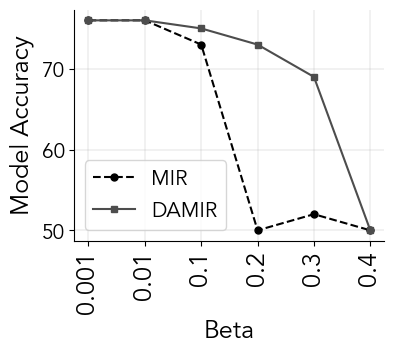

In [48]:
plot_fig(model_acc_dict)

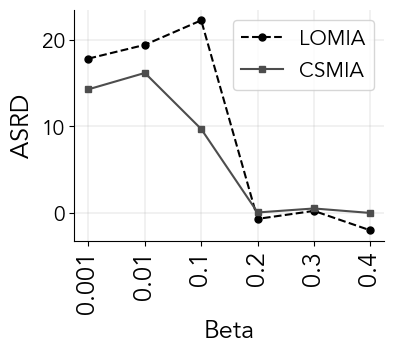

In [50]:
plot_fig(mir_asrd, y_label='ASRD')

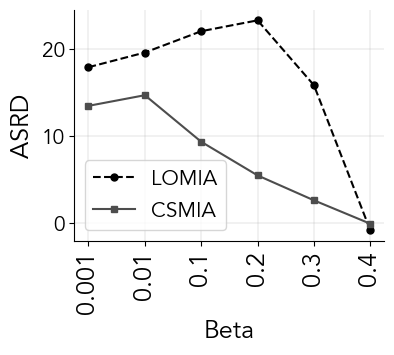

In [51]:
plot_fig(damir_asrd, y_label='ASRD')

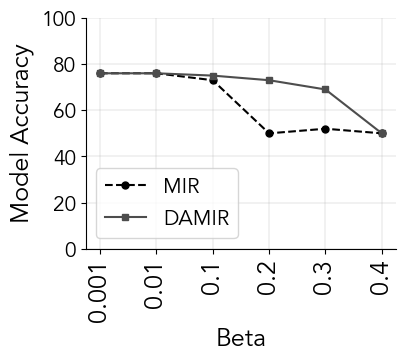

In [41]:
df = pd.DataFrame.from_dict(model_acc_dict, orient='index')
groups = df.columns
fig, ax = plt.subplots(figsize=(4, 3))
line_styles = ['--', '-', '-.', ':']
colors = ['#000000', '#4D4D4D', '#7F7F7F', '#BFBFBF']  # Different shades of black/gray
markers = ['o', 's', '^', 'd']  # Circle, square, triangle up, diamond
for i, group in enumerate(groups):
    plt.plot(range(df.shape[0]), df[f'{group}'], label=group, marker=markers[i], linestyle=line_styles[i], color=colors[i], markersize=5)
plt.legend()

x_ticks=[0.001,	0.01,	0.1,	0.2,	0.3,	0.4]
x_label='Beta'
y_label='Model Accuracy'

plt.xticks(ticks=range(len(x_ticks)),labels=np.array(x_ticks).astype(str).tolist(), fontsize=fontsize, rotation=90)
plt.xlabel(x_label, fontsize=fontsize)
plt.ylabel(y_label, fontsize=fontsize)
plt.ylim(0, 100)
plt.grid(True, linewidth=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [14]:
damir_asrd_CSMIA

{0.001: 14.68,
 0.01: 16.128,
 0.1: 9.991999999999997,
 0.2: 5.711999999999996,
 0.3: 2.8800000000000026,
 0.4: 0.8079999999999998}

In [19]:
model_acc_mir

{0.001: 76.0, 0.01: 76.0, 0.1: 73.0, 0.2: 50.0, 0.3: 52.0, 0.4: 50.0}

In [18]:
model_acc_damir

{0.001: 76.0, 0.01: 76.0, 0.1: 75.0, 0.2: 73.0, 0.3: 69.0, 0.4: 50.0}

In [11]:
mir_asrd_LOMIA

{0.001: 17.863999999999997,
 0.01: 19.455999999999996,
 0.1: 22.296,
 0.2: -0.7199999999999989,
 0.3: 0.2079999999999984,
 0.4: -2.0479999999999947}

In [19]:
performance_dict_texas = {
    'Version 1': {
        'CSMIA': {
            'Male': get_(0),
            'Female': get_(1)
        },
        'LOMIA': {
            'Male': get_(2),
            'Female': get_(3)
        },
        'Target Model Performance': {
            'Male': get_(5),
            'Female': get_(6)
        }
    },
    'Version 2': {
        'CSMIA': {
            'Male': get_(10),
            'Female': get_(11)
        },
        'LOMIA': {
            'Male': get_(12),
            'Female': get_(13)
        },
        'Target Model Performance': {
            'Male': get_(15),
            'Female': get_(16)
        }
    },
    'Balanced Correlation Defense': {
        'CSMIA': {
            'Male': get_(20),
            'Female': get_(21)
        },
        'LOMIA': {
            'Male': get_(22),
            'Female': get_(23)
        },
        'Target Model Performance': {
            'Male': get_(25),
            'Female': get_(26)
        }
    }
}

In [6]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 15

def plot_result(performance_dict, x_ticks=[0.001,	0.01,	0.1,	0.2,	0.3,	0.4], x_label='Beta', y_label='Attack Accuracy', labels=None):
    groups = ['Male', 'Female']
    # metric_name_dict = {'accuracy': 'Attack Accuracy', 'f1': 'F1 Score', 'fpr': 'False Positive Rate', 'precision': 'Precision', 'recall': 'Recall'}
    df = pd.DataFrame.from_dict(performance_dict, orient='index').T
    print(df)
    fig, ax = plt.subplots(figsize=(4, 3))
    line_styles = ['-', '--', '-.', ':']
    colors = ['#000000', '#4D4D4D', '#7F7F7F', '#BFBFBF']  # Different shades of black/gray
    markers = ['o', 's', '^', 'd']  # Circle, square, triangle up, diamond
    for i, group in enumerate(groups):
        custom_label = group if labels is None else labels[i]
        plt.plot(range(df.shape[0]), df[f'{group}'], label=custom_label, marker=markers[i], linestyle=line_styles[i], color=colors[i], markersize=5)
    plt.legend()
    
    plt.xticks(ticks=range(len(x_ticks)),labels=np.array(x_ticks).astype(str).tolist())
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim(0, 100)
    plt.grid(True, linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

In [83]:
np.array([0, 1]).astype(str).tolist()

['0', '1']

   Male  Female
0  80.0    76.0
1  79.0    76.0
2  77.0    75.0
3  75.0    73.0
4  70.0    69.0
5  50.0    50.0


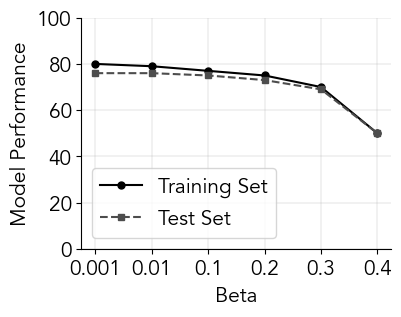

In [7]:
plot_result(performance_dict['Version 2']['Target Model Performance'], y_label='Model Performance', labels=['Training Set', 'Test Set'])

In [ ]:
plot_result(performance_dict['Balanced Correlation Defense']['CSMIA'], x_label='Correlation', x_ticks=[0, 0.1, 0.2, 0.3, ])

   Male  Female
0  81.0    76.0
1  79.0    77.0
2  79.0    77.0
3  78.0    77.0
4  78.0    77.0
5   NaN     NaN


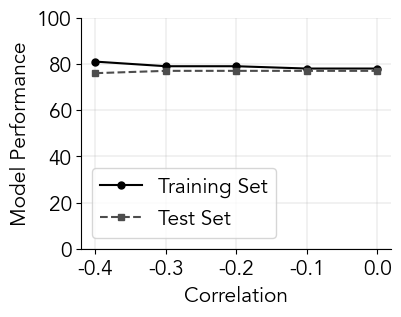

In [17]:
plot_result(performance_dict['Balanced Correlation Defense']['Target Model Performance'], y_label='Model Performance', x_label='Correlation', x_ticks=[-0.4, -0.3, -0.2, -0.1, 0], labels=['Training Set', 'Test Set'])

      Male  Female
0   81.036  72.722
1   78.812  74.542
2   78.076  75.072
3   77.668  75.822
4   77.076  75.774
5      NaN     NaN
6      NaN     NaN
7      NaN     NaN
8      NaN     NaN
9      NaN     NaN
10     NaN     NaN
11     NaN     NaN
12     NaN     NaN


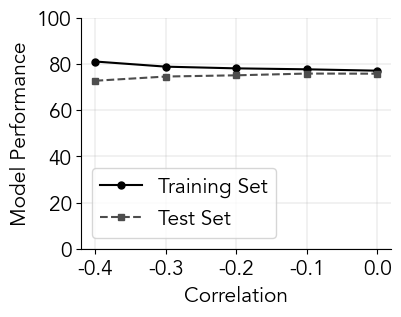

In [20]:
plot_result(performance_dict_texas['Balanced Correlation Defense']['Target Model Performance'], y_label='Model Performance', x_label='Correlation', x_ticks=[-0.4, -0.3, -0.2, -0.1, 0], labels=['Training Set', 'Test Set'])

      Male  Female
0   67.680  67.960
1   65.000  65.000
2   59.992  59.992
3   53.176  51.648
4   49.928  51.848
5      NaN     NaN
6      NaN     NaN
7      NaN     NaN
8      NaN     NaN
9      NaN     NaN
10     NaN     NaN
11     NaN     NaN
12     NaN     NaN


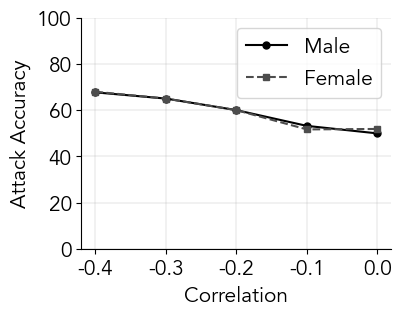

In [144]:
plot_result(performance_dict_texas['Balanced Correlation Defense']['CSMIA'], x_label='Correlation', x_ticks=[-0.4, -0.3, -0.2, -0.1, 0])

In [3]:
data

,Defense,Attack,Subgroup,0.001,0.01,0.1,0.2,0.3,0.4
0,Version 1,CSMIA,Male,54.856,51.968,49.512,50.024,50.016,49.704
1,NaN,NaN,Female,69.16,68.168,59.208,50.048,50.504,49.672
2,NaN,LOMIA,Male,52.096,50.504,47.296,47.104,49.392,49.568
3,NaN,NaN,Female,69.96,69.960,69.592,46.384,49.600,47.520
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Performance on Training Set,NaN,0.8,0.790,0.760,0.500,0.520,0.510
6,NaN,Performance on Test Set,NaN,0.76,0.760,0.730,0.500,0.520,0.500
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Beta,NaN,NaN,NaN,NaN,NaN
9,Defense,Attack,Subgroup,0.001,0.010,0.100,0.200,0.300,0.400
